## Principle Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

### Load Example Dataset

Visualizing example dataset for PCA.




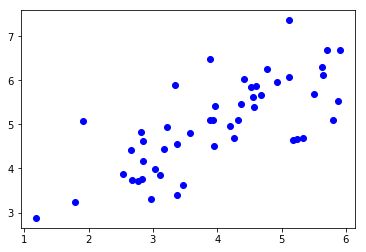

In [2]:
print('Visualizing example dataset for PCA.\n\n')

data = loadmat('ex7data1.mat')
X = data['X']

plt.plot(X[:,0], X[:,1], 'bo')
plt.show()

### Principal Component Analysis

In [3]:
def featureNormalize(X):
    
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    
    sigma = np.std(X, axis=0)
    X_norm /= sigma
    
    return (X_norm, mu, sigma)

In [4]:
def pca(X):
    
    m = X.shape[0]
    sigma = (1/m) * X.T.dot(X)
    
    (U, S, temp) = np.linalg.svd(sigma)
    return (U, S)

Running PCA on example dataset...
Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


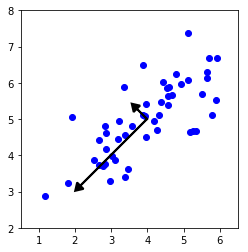

In [5]:
print("Running PCA on example dataset...")

[X_norm, mu, sigma] = featureNormalize(X)

[U, S] = pca(X_norm)


# this visualization is from https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise7/exercise7.ipynb
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo')

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')

### Dimension Reduction

In [6]:
def projectData(X, U, K):
    Z = np.zeros((X.shape[0], K))
    
    Ureduce = U[:, :K]
    Z = X.dot(Ureduce)
    
    return Z

In [7]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print(f'Projection of the first example: {Z[0,0]}')
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.4963126084578513
(this value should be about    : 1.481274)


In [8]:
def recoverData(Z, U, K):
    
    X_rec = Z.dot(U[:,:K].T)
    
    return X_rec

Approximation of the first example: [-1.058053 -1.058053]
       (this value should be about  [-1.047419 -1.047419])


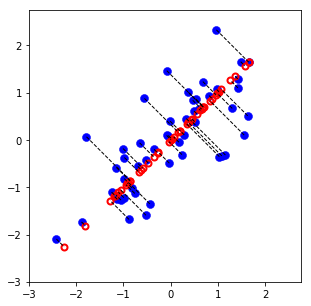

In [9]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

### Loading and Visualizing Face Data

In [10]:
# https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise7/exercise7.ipynb

def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data in a nice grid.
    Parameters
    ----------
    X : array_like
        The input data of size (m x n) where m is the number of examples and n is the number of
        features.
    example_width : int, optional
        THe width of each 2-D image in pixels. If not provided, the image is assumed to be square,
        and the width is the floor of the square root of total number of pixels.
    figsize : tuple, optional
        A 2-element tuple indicating the width and height of figure in inches.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis('off')

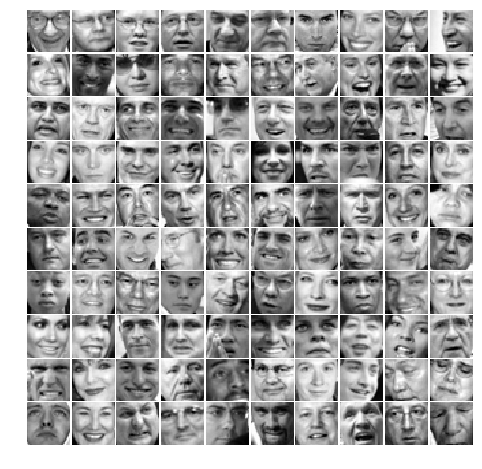

In [11]:
data = loadmat('ex7faces.mat')
X = data['X']

displayData(X[:100,:], figsize=(8,8))

### PCA on Face Data: Eigenfaces


Running PCA on face dataset.
(this might take a minute or two ...)




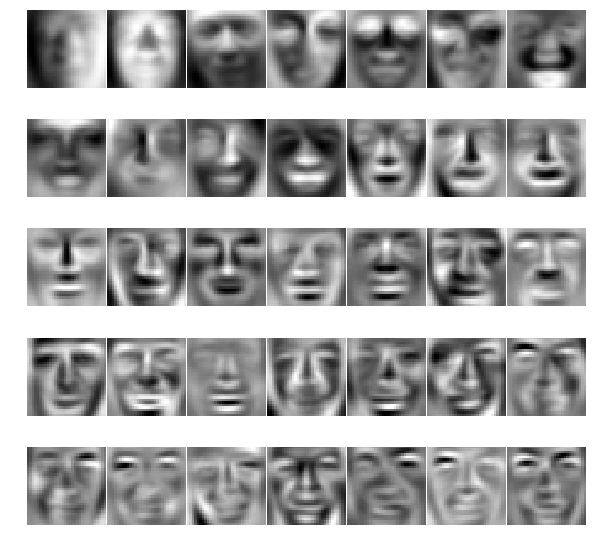

In [12]:
print('\nRunning PCA on face dataset.\n(this might take a minute or two ...)\n\n')

[X_norm, mu, sigma] = featureNormalize(X);

[U, S] = pca(X_norm)

displayData(U[:, 1:36].T)

### Dimension Reduction for Faces

In [13]:
K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a size of: ')
print(Z.shape[0])

The projected data Z has a size of: 
5000


### Visualization of Faces after PCA Dimension Reduction


Visualizing the projected (reduced dimension) faces.




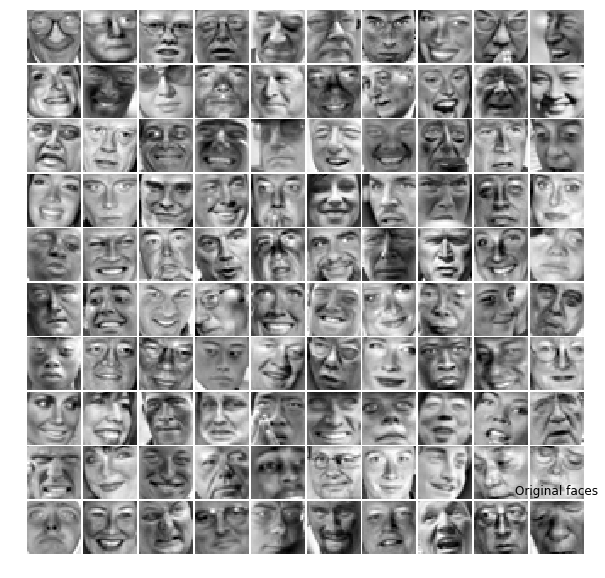

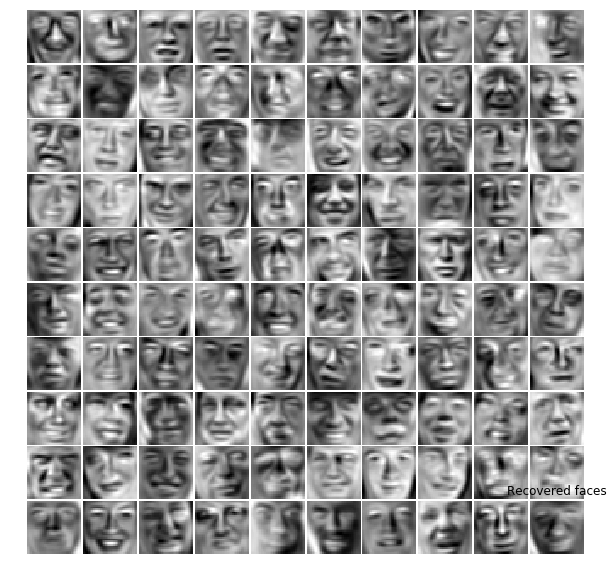

In [14]:
print('\nVisualizing the projected (reduced dimension) faces.\n\n');

K = 100;
X_rec  = recoverData(Z, U, K);

# Display normalized data
displayData(X_norm[:100,:]);
plt.title('Original faces');

# Display reconstructed data from only k eigenfaces

displayData(X_rec[:100,:]);
plt.title('Recovered faces');
